<a href="https://colab.research.google.com/github/asishpattnaik1/CE888/blob/main/Lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)
import matplotlib.pyplot as plt

In [29]:
user_ratings = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None )
print(user_ratings)
user_ratings.info()

       0      1      2      3      4    ...    96     97     98     99     100
0       74  -7.82   8.79  -9.66  -8.16  ...  99.00  -5.63  99.00  99.00  99.00
1      100   4.08  -0.29   6.36   4.37  ...  -2.14   3.06   0.34  -4.32   1.07
2       49  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
3       48  99.00   8.35  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
4       91   8.50   4.61  -4.17  -5.39  ...   1.55   3.11   6.55   1.80   1.60
...    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
24978  100   0.44   7.43   9.08   2.33  ...   9.03   6.55   8.69   8.79   7.43
24979   91   9.13  -8.16   8.59   9.08  ...  -8.20  -7.23  -8.59   9.13   8.45
24980   39  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24981   37  99.00  99.00  99.00  99.00  ...  99.00  99.00  99.00  99.00  99.00
24982   72   2.43   2.67  -3.98   4.27  ...  99.00  99.00  99.00  99.00  99.00

[24983 rows x 101 columns]
<class 'pandas.core.fram

There's a column you need to remove because it doesn't contain ratings. Check the description of the dataset and figure out which one. Then drop it.

In [3]:
#dropping first column
user_ratings.drop(columns=[0],axis=1, inplace=True)

Check the dataset description to figure out which value you should replace with NaNs (the cells for which we don't have a rating). This is the test set.

In [4]:
user_ratings= user_ratings.replace(99.00, np.NaN)
user_ratings.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


Use pandas to find the best- and the worst-rated jokes

In [6]:

mean_rating = user_ratings.mean(axis=0)
mean_rating

1      0.904573
2      0.208460
3      0.316574
4     -1.449114
5      0.403556
         ...   
96     1.528003
97     1.673750
98     0.767692
99    -0.031244
100    1.354711
Length: 100, dtype: float64

In [33]:
(pd.DataFrame(mean_rating)).nlargest(10,0)

,0
50,3.665085
89,3.574720
36,3.312500
27,3.189821
32,3.155988
35,3.006351
62,2.976021
29,2.972455
53,2.939463
49,2.771298


In [30]:
#Quiz
user_ratings.iloc[168, 25]

5.44

Modify and use the helper function provided in the helper_function notebook (or create your own) to label 10% of the dataset cells that are not NaNs as 99. This is your validation set. Keep the the actual values of the cells so you can use them later (as done in the example of the helper_function notebook).

In [9]:
arr = user_ratings.values
print(arr.shape)

(24983, 100)


In [10]:
rated = np.where(~np.isnan(arr))
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [11]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  #~np.isnan(a)
  new_data = orig.copy()
  rated = np.where(~np.isnan(arr))
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [14]:
new_arr, idx = replace(arr, 0.1)
new_arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [99.  , -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [16]:
arr[idx[0][0], idx[1][0]]

9.22

In [17]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [18]:
n_latent_factors = 2

#user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((arr.shape[0], n_latent_factors))
latent_item_features = np.random.random((arr.shape[1], n_latent_factors))

In [19]:
latent_user_preferences

array([[0.118, 0.408],
       [0.023, 0.658],
       [0.714, 0.187],
       ...,
       [0.831, 0.026],
       [0.175, 0.768],
       [0.502, 0.866]])

In [20]:
latent_item_features

array([[7.130e-01, 7.951e-01],
       [8.005e-01, 3.244e-01],
       [4.997e-01, 1.587e-01],
       [9.325e-01, 2.141e-01],
       [2.014e-01, 4.155e-01],
       [6.314e-01, 8.703e-01],
       [4.951e-01, 9.767e-01],
       [9.284e-01, 1.831e-01],
       [5.686e-01, 7.340e-01],
       [9.251e-01, 4.885e-01],
       [7.631e-02, 7.931e-01],
       [2.291e-01, 6.654e-02],
       [8.023e-01, 3.771e-01],
       [2.047e-01, 6.041e-01],
       [6.573e-01, 9.384e-04],
       [7.575e-01, 9.797e-01],
       [1.087e-01, 7.110e-01],
       [1.594e-01, 7.603e-01],
       [6.699e-01, 1.239e-01],
       [4.893e-01, 3.992e-01],
       [9.590e-01, 2.763e-01],
       [6.308e-01, 1.683e-01],
       [4.546e-01, 7.072e-01],
       [2.181e-01, 6.680e-01],
       [3.332e-03, 3.932e-01],
       [9.634e-01, 2.370e-01],
       [1.932e-02, 7.449e-01],
       [3.087e-01, 3.464e-01],
       [2.743e-02, 5.785e-01],
       [4.608e-01, 5.478e-01],
       [1.021e-01, 4.484e-01],
       [3.424e-01, 2.103e-01],
       [

In [21]:
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [22]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = arr[user_id, item_id]
                if (~np.isnan(rating)) and rating!=99 :
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/100:	MSE=26.219327
Iteration 10/100:	MSE=23.067969
Iteration 20/100:	MSE=21.178826
Iteration 30/100:	MSE=18.990432
Iteration 40/100:	MSE=17.464285
Iteration 50/100:	MSE=17.218648
Iteration 60/100:	MSE=17.157252
Iteration 70/100:	MSE=17.138426
Iteration 80/100:	MSE=17.132520
Iteration 90/100:	MSE=17.130863


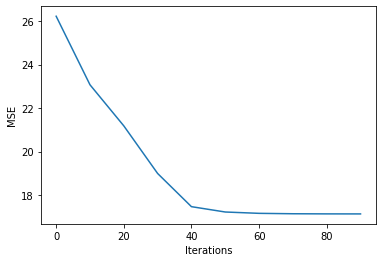

In [23]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [24]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.915, -4.176, -5.642, ..., -2.462, -6.21 , -2.581],
       [ 2.986,  3.151,  3.789, ...,  2.513,  3.958,  2.756],
       [ 6.855,  7.148,  7.44 , ...,  7.324,  7.179,  8.253],
       ...,
       [-1.086, -1.154, -1.486, ..., -0.782, -1.602, -0.839],
       [-1.83 , -1.961, -2.769, ..., -0.988, -3.103, -1.006],
       [ 2.784,  2.869,  2.518, ...,  3.596,  2.153,  4.122]])

In [25]:
values = [zip(arr[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = user_ratings.columns

In [26]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.914794675685056)","(8.79, -4.1762599302206915)","(-9.66, -5.6415671815246515)","(-8.16, -9.542993577430218)","(-7.52, -2.6852953013911485)","(-8.5, -1.7743957270736164)","(-9.85, -4.921881164779105)","(4.17, -4.321089737453204)","(-8.98, -8.842593618208037)","(-4.76, -3.7305605158847186)","(-8.5, -1.6068148822830757)","(-6.75, -1.738592606761607)","(-7.18, -6.491458900431072)","(8.45, -1.5688132838719826)","(-7.18, -6.549470438000572)","(-7.52, -10.006477370445374)","(-7.43, -4.454286362039718)","(-9.81, -5.298083510541364)","(-9.85, -3.831267867927253)","(-9.85, -6.120723811002434)","(-9.37, 0.4103982137922446)","(1.5, -4.307521585375002)","(-4.37, -6.0965096899610165)","(-9.81, -10.560453734240408)","(-8.5, -4.641093468161272)","(1.12, -1.5690731454737508)","(7.82, 3.413209935394003)","(2.86, -1.6896713848848548)","(9.13, 3.480444429252022)","(-7.43, -7.926478211744767)","(2.14, 1.1078586042607128)","(-4.08, 3.22112233706028)","(-9.08, -9.430290374893058)","(7.82, -2.694901883383405)","(5.05, 2.8377927523982103)","(4.95, 3.666680119115041)","(-9.17, -9.130695593727276)","(-8.4, -3.4681803715178194)","(-8.4, -2.5101172067124593)","(-8.4, -3.6777479755473617)",...,"(8.59, 1.2024702001653904)","(3.59, 2.09787217590988)","(-6.84, -5.4058616351667155)","(-9.03, -8.324030968937755)","(2.82, 1.3422519169594023)","(-1.36, 1.515611514622798)","(-9.08, -8.80252591646536)","(8.3, 1.7328263593379047)","(5.68, 1.7537519255614435)","(-4.81, -4.670277210047442)","(nan, -6.79342471332359)","(nan, 1.1461503755651283)","(nan, -3.385197092298854)","(nan, -9.215417530577133)","(nan, -6.0581131594541375)","(nan, 0.5311764031365058)","(nan, -4.231770413237805)","(-9.42, -2.283188213504882)","(nan, -5.389856892372364)","(nan, -2.710274927312309)","(nan, -1.3490152899805568)","(-7.72, -4.662309054608204)","(nan, -0.3754816321943732)","(nan, -4.8430046471547845)","(nan, -4.177220156086903)","(nan, -6.280384382975297)","(nan, -1.1608170741276689)","(nan, -1.2942293423679014)","(nan, 3.147613810216925)","(nan, -5.337019348720566)","(2.82, -1.5315083944341559)","(nan, -3.2230279245198115)","(nan, 0.20480567954035203)","(nan, -4.762544667848928)","(nan, -3.9660752303329)","(nan, -2.9055769503852185)","(-5.63, -2.202856909380219)","(nan, -2.4616445373456712)","(nan, -6.210147054234361)","(nan, -2.5814933510799194)"
1,"(4.08, 2.9860471582778993)","(-0.29, 3.1507706779060154)","(6.36, 3.7890170879405694)","(4.37, 5.266412345551495)","(-2.38, 2.2160178619341404)","(-9.66, 2.519983588057648)","(-0.73, 2.975381714858375)","(-5.34, 2.3291590801720323)","(8.88, 5.072099303722159)","(9.22, 2.9949024210636144)","(6.75, 2.39370594671184)","(8.64, 2.5648006527993745)","(4.42, 3.146452005748238)","(7.43, 2.4826379547450013)","(4.56, 3.0184384231063692)","(-0.97, 4.320669324444381)","(4.66, 2.45717495054715)","(-0.68, 2.9527703766339277)","(3.3, 2.7290274992723296)","(-1.21, 3.5831716258195923)","(0.87, 1.6289164543310886)","(8.64, 3.4892026929549402)","(8.35, 4.016836813593461)","(9.17, 5.512929513625301)","(0.05, 3.539279289581526)","(7.57, 2.4287280896148356)","(4.71, 0.2438427426774785)","(0.87, 2.3974537103371647)","(-0.39, 0.12719761822219125)","(6.99, 4.868089701373424)","(6.5, 1.2547688038191758)","(-0.92, 0.33261752035455616)","(7.14, 5.212079658464102)","(9.03, 2.772785224993094)","(-1.8, 0.5310284701929108)","(0.73, 0.05398348872379363)","(7.09, 4.855278349242611)","(3.4, 3.0689210086525116)","(-0.87, 2.7926355151608373)","(7.91, 3.222659408010098)",...,"(-6.7, 1.3084052688717094)","(-3.35, 0.8892059101653609)","(-9.03, 3.789415642837514)","(4.47, 4.7202224357791485)","(4.08, 1.1570106045062265)","(-3.83, 1.0792593270477462)","(8.74, 4.9529666362198315)","(1.12, 0.9511639338284233)","(0.78, 1.019058818517432)"

Link to code for movie database - https://github.com/asishpattnaik1/CE888/blob/main/Lab4/my_recommender_movies.ipynb